# Tarea 3
## Matemáticas para la Ciencia de Datos
## Docente: **Briceyda B. Delgado**
## Alumno: **Luis Fernando Izquierdo Berdugo**
## Fecha: **9 de Septiembre de 2024**

### Instrucciones
Considere el siguiente sistema de ecuaciones diferenciales

#### $F' = (2-S)F$,  $F(0) = F_0$
#### $S' = (1-F)S$,  $S(0) = S_0$

1. (20 puntos) Dar una solución analítica del sistema, en términos de las
condiciones iniciales.
2. (10 puntos) Verifique que el sistema (1) admite el esquema numérico
### $F_{n+1} = F_n + \Delta t(2-S_n)F_n$
### $S_{n+1} = S_n + \Delta t(1-F_n)S_n$
Explique el procedimiento para llegar a la expresión anterior.

3. Realice un programa que implemente el esquema anterior y que realice las siguientes funciones:
    - (10 puntos) Acepte como entradas $S_0$, $F_0$ y $\Delta t$
    - (10 puntos) Calcule la solución numérica para t variando de 0 a 10. Indique la solución numérica cuando $S_0 = 0.1$, $F_0 = 1.9$ y $\Delta t = 0.001$
4. (20 puntos) Encuentre un segundo esquema numérico, usando Crank-Nicholson que represente al sistema de ecuaciones diferenciales.
5. (20 puntos) Grafique la solución numérica como una función de $t$ y en el espacio de estados en el sistema coordenado F-S.
6. (10 puntos) Explique alguna aplicación o fenómeno modelado a través de sistemas de ecuaciones diferenciales.

### Inciso 1

Si se tiene el sistema de ecuaciones siguiente:

#### $F' = (2-S)F$,  $F(0) = F_0$
#### $S' = (1-F)S$,  $S(0) = S_0$

Si se efectúa el cociente de ambas ecuaciones, podemos escribir

#### $\frac{ds}{df} = \frac{S(1-F)}{F(2-S)}$

Se resuelve por variables separables:

#### $F(2-S)ds = S(1-F)df$

#### $\frac{(2-S)}{S}ds = \frac{(1-F)}{F}df$

Se integran ambos lados

#### $2lnS - S = lnF - F + C$

Sustituyendo las condiciones iniciales y despejando C

$2lnS_0 - S_0 - lnF_0 + F_0 = C$

#### $2lnS - S = lnF - F + 2lnS_0 - S_0 - lnF_0 + F_0$

Simplificando

#### $ln(\frac{S^2}{F}) - S + F = 2lnS_0 - S_0 - lnF_0 + F_0$


## Inciso 2
Se introduce el paso de tiempo $\Delta t > 0$ y se define $t_n = n\Delta t$

$F_n$ y $S_n$ serán las aproximaciones de $F(t_n)$ y $S(t_n)$ respectivamente, ya que:

#### $\frac{F(t_{n+1})-F(t_n)}{\Delta t} \approx F'(t_n)$
#### $\frac{S(t_{n+1})-S(t_n)}{\Delta t} \approx S'(t_n)$

Entonces 

#### $\frac{F_{n+1}-F_n}{\Delta t} = (2-S_n)F_n$
#### $\frac{S_{n+1}-S_n}{\Delta t} = (1-F_n)S_n$

Despejando se obtiene:

#### $F_{n+1} = F_n + \Delta t(2-S_n)F_n$
#### $S_{n+1} = S_n + \Delta t(1-F_n)S_n$

### Inciso 3

In [14]:
import numpy as np

def sistEq(s0, f0, dt):
    t = np.arange(0, 10, dt)
    S = np.zeros_like(t)
    F = np.zeros_like(t)
    S[0] = s0
    F[0] = f0
    
    for i in range(1, len(t)):
        F[i] = F[i-1] + (dt*(2-S[i-1])*F[i-1])
        S[i] = S[i-1] + (dt*(1-F[i-1])*S[i-1])
        
    return F, S, t


In [15]:
F,S,t = sistEq(0.1, 1.9, 0.001)
print(f"F: {F}")
print(f"S: {S}")
print(f"t: {t}")

F: [1.90000000e+00 1.90361000e+00 1.90722703e+00 ... 8.62814834e+08
 8.64540464e+08 8.66269545e+08]
S: [0.1        0.09991    0.09981972 ... 0.         0.         0.        ]
t: [0.000e+00 1.000e-03 2.000e-03 ... 9.997e+00 9.998e+00 9.999e+00]


### Iniciso 4
La forma básica de Crank-Nicholson es:
#### $\frac{u_{n+1}-u_n}{\Delta t} = \frac{1}{2}(f(u_{n+1})+f(u_n))$

Si se aplica a ambas ecuaciones, se obtiene:
#### $\frac{F_{n+1}-F_n}{\Delta t} = \frac{1}{2}[(2-S_n)F_n+(2-S_{n+1})F_{n+1}]$
#### $\frac{S_{n+1}-S_n}{\Delta t} = \frac{1}{2}[(1-F_n)S_n + (1-F_{n+1})S_{n+1}]$

Reescribiendo el sistema

#### $F_{n+1}-F_n = \frac{\Delta t}{2}[(2-S_n)F_n+(2-S_{n+1})F_{n+1}]$
#### $S_{n+1}-S_n = \frac{\Delta t}{2}[(1-F_n)S_n + (1-F_{n+1})S_{n+1}]$

#### $2F_{n+1} - 2F_n = 2 \Delta t F_n - \Delta t S_n F_n + 2\Delta tF_{n+1} - \Delta t S_{n+1}F_{n+1}$

#### $2S_{n+1} - 2S_n = \Delta t S_n - \Delta t F_n S_n + \Delta t S_{n+1} - \Delta t F_{n+1} S_{n+1}$

#### $2F_{n+1} - 2\Delta t F_{n+1} - \Delta t S_{n+1}F_{n+1} = 2 F_n + 2\Delta t F_n - \Delta t S_n F_n$

#### $2S_{n+1} - \Delta t S_{n+1} + \Delta t F_{n+1} S_{n+1}= 2S_n + \Delta t S_n - \Delta t F_n S_n$

Para cada n, se define un sistema de ecuaciones lineales 2x2, como se observa en la matriz $A$:
```math
\begin{bmatrix}
2-2\Delta t - \Delta t S_{n+1} & -\Delta t F_{n+1} \\
\Delta t S_{n+1} & 2 - \Delta t + \Delta t F_{n+1} 
\end{bmatrix}
```

y con el vector $b_n$
```math
\begin{pmatrix}
2 F_n + 2\Delta t F_n - \Delta t S_n F_n \\
2S_n + \Delta t S_n - \Delta t F_n S_n 
\end{pmatrix}  
```

Entonces, el sistema se puede reescribir como

#### $Ax_{n+1} = b_n$

Donde $x_{n+1}$ se define como el vector:
```math
\begin{pmatrix}
F_{n+1} \\
S{n+1}
\end{pmatrix}  
```

Se obtiene el determinante de A:

$det(A) = -2F_{n+1}\Delta t^2 + S_{n+1}\Delta t^2 + 2 \Delta t^2 + 2F_{n+1}\Delta t - 2S_{n+1}\Delta t - 6\Delta t + 4$

y su matriz inversa dada por la multiplicación de

#### $\frac{1}{2\Delta t^2 - 6\Delta t - 2\Delta t^2F_{n+1} + 2\Delta tF_{n+1}+\Delta t^2S_{n+1}-2\Delta tS_{n+1} + 4}$

Matriz Inversa

```math
\begin{bmatrix}
 \frac{2 - \Delta t + \Delta t F_{n+1}}{2\Delta t^2 - 6\Delta t - 2\Delta t^2F_{n+1} + 2\Delta tF_{n+1}+\Delta t^2S_{n+1}-2\Delta tS_{n+1} + 4} & \frac{\Delta t F_{n+1}}{2\Delta t^2 - 6\Delta t - 2\Delta t^2F_{n+1} + 2\Delta tF_{n+1}+\Delta t^2S_{n+1}-2\Delta tS_{n+1} + 4} \\
 \frac{-\Delta t S_{n+1}}{2\Delta t^2 - 6\Delta t - 2\Delta t^2F_{n+1} + 2\Delta tF_{n+1}+\Delta t^2S_{n+1}-2\Delta tS_{n+1} + 4} & \frac{2-2\Delta t - \Delta t S_{n+1}}{2\Delta t^2 - 6\Delta t - 2\Delta t^2F_{n+1} + 2\Delta tF_{n+1}+\Delta t^2S_{n+1}-2\Delta tS_{n+1} + 4}
\end{bmatrix}
```

Vector
```math
\begin{pmatrix}
2 F_n + 2\Delta t F_n - \Delta t S_n F_n \\
2S_n + \Delta t S_n - \Delta t F_n S_n 
\end{pmatrix}  
```

$4F_$

### Inciso 5

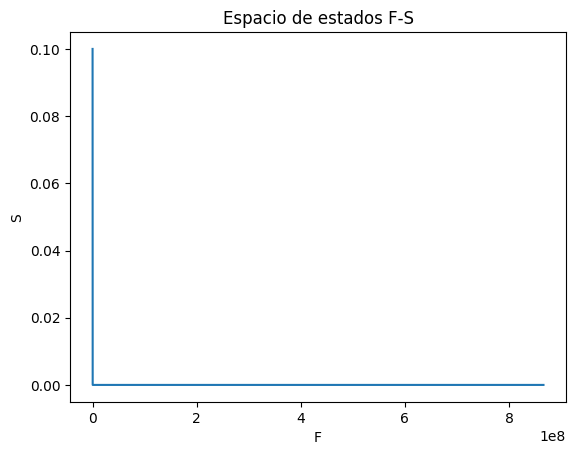

In [18]:
import matplotlib.pyplot as plt

plt.plot(F, S)
plt.xlabel('F')
plt.ylabel('S')
plt.title('Espacio de estados F-S')
plt.show()